In [1]:
#librerias para manejo de datos
import numpy as np
import pandas as pd

#librerias para ejecutar comnandos de sistema operativo
import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [59]:
#librerias para graficos y visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
#librerias estadisticas
import scipy.stats as stats
from scipy.stats import pearsonr
#librerias para modelos lineales
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
amsterdam_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv")
amsterdam_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekends.csv")
athens_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/athens_weekdays.csv")
athens_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/athens_weekends.csv")
barcelona_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekdays.csv")
barcelona_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekends.csv")
berlin_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/berlin_weekdays.csv")
berlin_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/berlin_weekends.csv")
budapest_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/budapest_weekdays.csv")
budapest_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/budapest_weekends.csv")
lisbon_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekdays.csv")
lisbon_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekends.csv")
london_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/london_weekdays.csv")
london_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/london_weekends.csv")
paris_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/paris_weekdays.csv")
paris_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/paris_weekends.csv")
rome_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/rome_weekdays.csv")
rome_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/rome_weekends.csv")
vienna_weekdays = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/vienna_weekdays.csv")
vienna_weekends = pd.read_csv("/kaggle/input/airbnb-prices-in-european-cities/vienna_weekdays.csv")

In [28]:
amsterdam_weekdays.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [29]:
def combine (csv_1,col_1,csv_2,col_2,city):
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    merged = pd.concat([csv_1,csv_2])
    merged['city'] = city
    return merged

In [30]:
amsterdam = combine(amsterdam_weekdays,"weekdays",amsterdam_weekends,"weekends","amsterdam")
athenas = combine(athens_weekdays,"weekdays",athens_weekends,"weekends","athens")
barcelona = combine(barcelona_weekdays,"weekdays",barcelona_weekends,"weekends","barcelona")
berlin = combine(berlin_weekdays,"weekdays",berlin_weekends,"weekends","berlin")
budapest = combine(budapest_weekdays,"weekdays",budapest_weekends,"weekends","budapest")
lisbon = combine(lisbon_weekdays,"weekdays",lisbon_weekends,"weekends","lisbon")
london = combine(london_weekdays,"weekdays",london_weekends,"weekends","london")
paris = combine(paris_weekdays,"weekdays",paris_weekends,"weekends","paris")
rome = combine(rome_weekdays,"weekdays",rome_weekends,"weekends","rome")
vienna = combine(vienna_weekdays,"weekdays",vienna_weekends,"weekends","vienna")


In [138]:
#concatenamos toda la informacion en un solo dataframe
cities = [amsterdam, athenas, barcelona, berlin, lisbon, budapest, london, paris, rome, vienna]
europe_data = pd.concat(cities, ignore_index=True)
europe_data.drop(columns = ["Unnamed: 0"], inplace=True)

In [139]:
europe_data.head(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


In [140]:
europe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51646 entries, 0 to 51645
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51646 non-null  float64
 1   room_type                   51646 non-null  object 
 2   room_shared                 51646 non-null  bool   
 3   room_private                51646 non-null  bool   
 4   person_capacity             51646 non-null  float64
 5   host_is_superhost           51646 non-null  bool   
 6   multi                       51646 non-null  int64  
 7   biz                         51646 non-null  int64  
 8   cleanliness_rating          51646 non-null  float64
 9   guest_satisfaction_overall  51646 non-null  float64
 10  bedrooms                    51646 non-null  int64  
 11  dist                        51646 non-null  float64
 12  metro_dist                  51646 non-null  float64
 13  attr_index                  516

In [143]:
#resumen cantidad de alquileres por ciudad
listing_counts = europe_data.groupby("city").realSum.count().reset_index()

In [144]:
#resumen cantidad de alquileres de superhost por ciudad
superhost_sum = europe_data.groupby("city").host_is_superhost.sum().reset_index()

In [145]:
#añadir nueva columna con abreviatura del nombre ciudad
superhost_sum["abbr"] = superhost_sum.city.apply(lambda x: x[:3].upper())

In [146]:
#unimos dataframes y ordenamos por la realSum de forma descendente
listing_superhost_sum = pd.merge(listing_counts, superhost_sum).sort_values("realSum", ascending=False)

In [147]:
#añadir nueva columna
listing_superhost_sum["perc"] = listing_superhost_sum.apply(lambda row: round(row["host_is_superhost"]/row["realSum"]*100, 1), axis=1)

In [148]:
#añadir simbolo de porcentaje a la columna cambiando a string (%)
listing_superhost_sum["perc"] = listing_superhost_sum.perc.apply(lambda x: str(x)+"%")

In [149]:
listing_superhost_sum

,city,realSum,host_is_superhost,abbr,perc
6,london,9993,1573,LON,15.7%
8,rome,9027,2949,ROM,32.7%
7,paris,6688,941,PAR,14.1%
5,lisbon,5763,1233,LIS,21.4%
1,athens,5280,2263,ATH,42.9%
4,budapest,4022,1524,BUD,37.9%
9,vienna,3476,1020,VIE,29.3%
2,barcelona,2833,514,BAR,18.1%
3,berlin,2484,639,BER,25.7%
0,amsterdam,2080,591,AMS,28.4%


In [150]:
##set paleta de colores para graficos

palette = ["#FC814A", "#816581", "#96939B", "#BFBFBF", "#E8E8E8"]
diverging23 = sns.diverging_palette(h_neg=300, h_pos=90, s=97, l=64, sep=1, n=23, center="light")
diverging9 = sns.diverging_palette(h_neg=300, h_pos=90, s=97, l=64, sep=1, n=9, center="light")

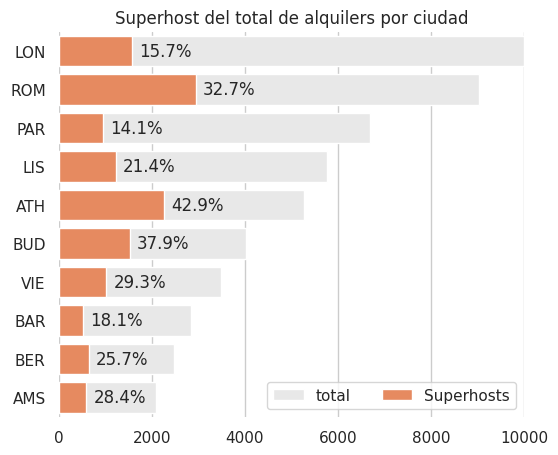

<function matplotlib.pyplot.clf()>

In [151]:
#seteamos variables, estilo tamaño y color
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6,5))

#creamos grafico de barras 1
sns.set_color_codes("pastel")
sns.barplot(x="realSum", y="abbr", data=listing_superhost_sum, label="total", color="#E8E8E8")

#creamos grafico de barras 2
sns.set_color_codes("muted")
sns.barplot(x="host_is_superhost", y="abbr", data=listing_superhost_sum, label="Superhosts", color="#FC814A")
            
#Modificar atributos del grafico
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,10000),ylabel="", xlabel="")
ax.bar_label(ax.containers[1],labels=listing_superhost_sum.perc, label_type="edge", padding=5)
sns.despine(left=True, bottom=True)

#colocar el titulo al grafico
plt.title("Superhost del total de alquilers por ciudad")
plt.show()
plt.clf

In [152]:
def cat_satisfaccion(satisfaccion):
    if satisfaccion > 95:
        return "95-100"
    elif satisfaccion > 90:
        return "90-95"
    elif satisfaccion > 80:
        return "80-90"
    elif satisfaccion > 60:
        return "60-80"
    else:
        return "menor que 60"


In [153]:
def cat_cleanlineless(rating):
    if rating > 9:
        return "10"
    elif rating > 8:
        return "9"
    elif rating > 7:
        return "8"
    elif rating > 5:
        return "6-8"
    else:
        return "menor que 6"

In [154]:
#añadimos columnas categorizadas
europe_data["cat_satisfaccion"] = europe_data.guest_satisfaction_overall.apply(cat_satisfaccion)
europe_data["cat_cleanliness"] = europe_data.cleanliness_rating.apply(cat_cleanlineless)
europe_data["cat_bedrooms"] = europe_data.apply(lambda row: "3+" if row ["bedrooms"] >= 3 else row["bedrooms"], axis=1)

In [155]:
#cambiamoss de tipo de datos a integer
europe_data["person_capacity"] = europe_data.person_capacity.astype("int")

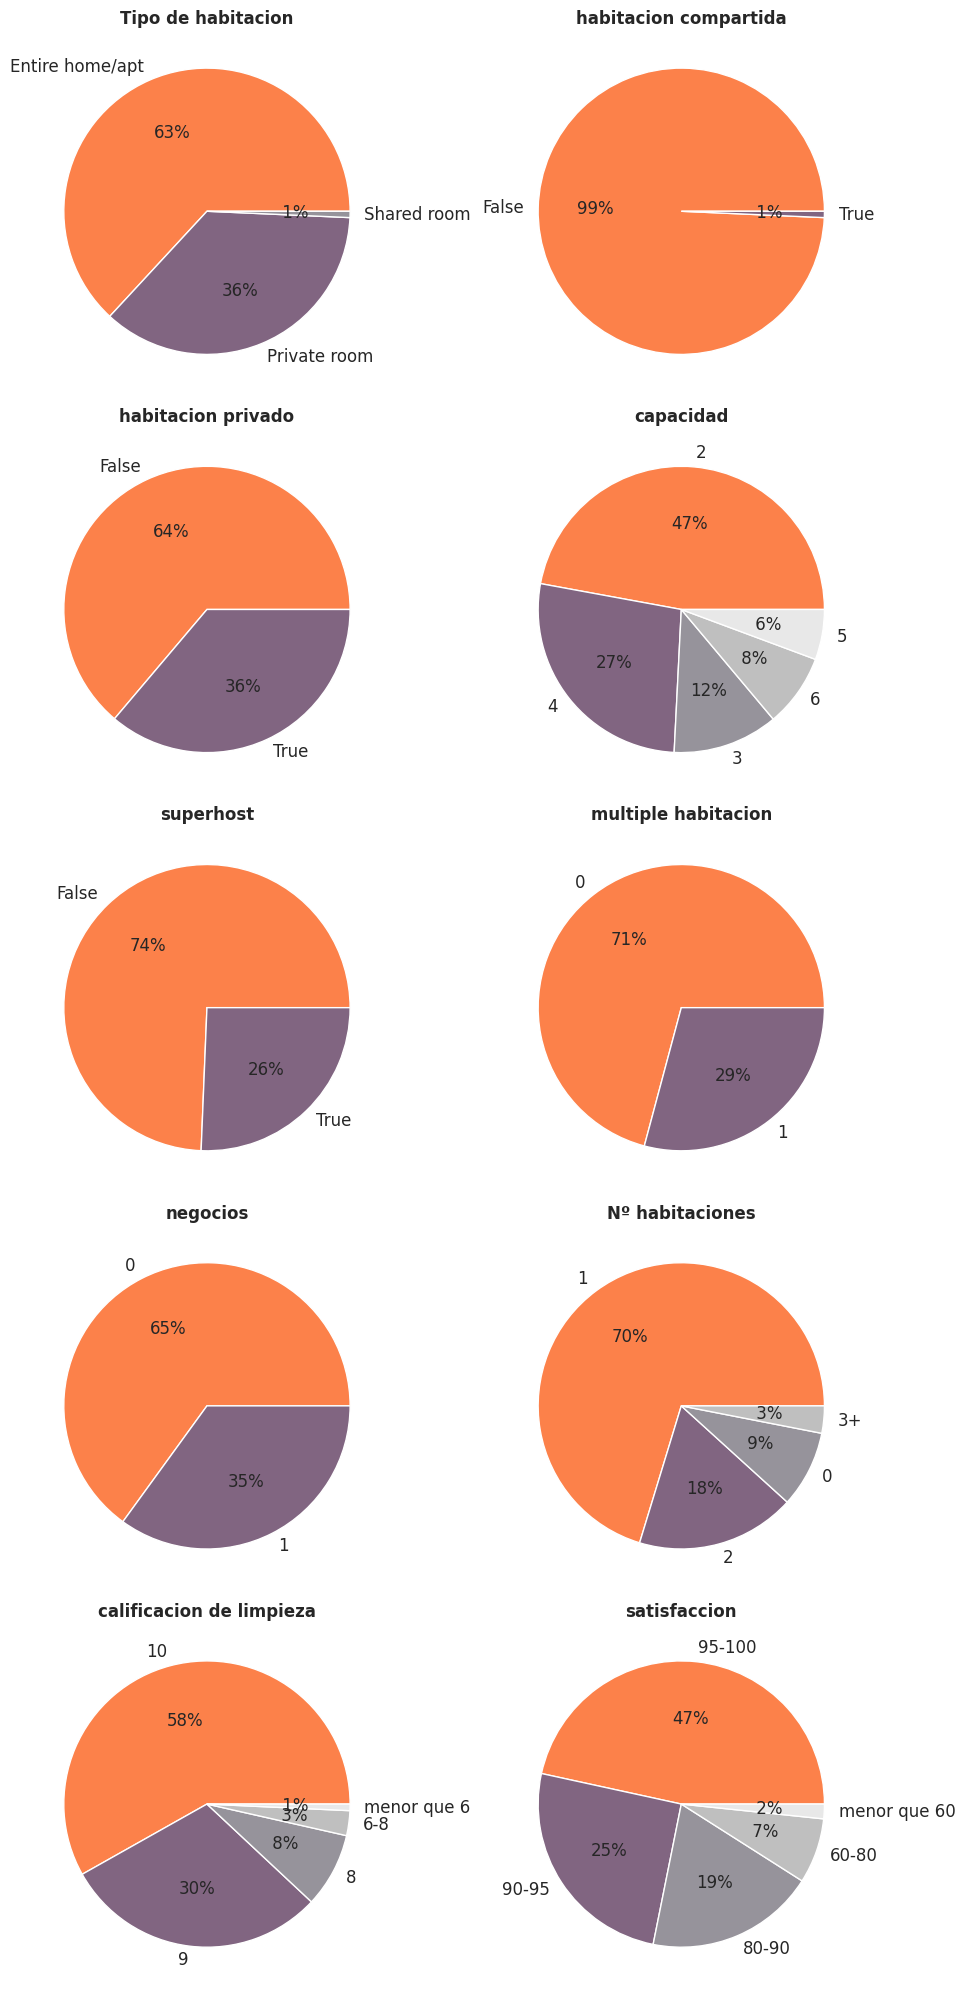

In [156]:
columns = ["room_type", "room_shared", "room_private", "person_capacity", "host_is_superhost", "multi", "biz", "cat_bedrooms", "cat_cleanliness", "cat_satisfaccion"]
titles = ["Tipo de habitacion", "habitacion compartida", "habitacion privado", "capacidad", "superhost", "multiple habitacion", "negocios", "Nº habitaciones", "calificacion de limpieza", "satisfaccion"]
plt.figure(figsize=(10,40))


#Iteramos para acceder a variables del arreglo
for i, col in enumerate(columns):
    ax=plt.subplot(10,2,i+1)
    
    #creamos grafico de pie porvariable del arreglo
    europe_data[col].value_counts().plot.pie(autopct="%2.f%%", textprops={"size":12},colors=palette)
    plt.title(titles[i],fontsize=12, fontweight="bold")
    plt.ylabel(None)
    
#mostramos graficos
plt.tight_layout()
plt.show()

In [157]:
ranks = europe_data.groupby("city")["realSum"].mean().sort_values()[::-1].index

<function matplotlib.pyplot.clf()>

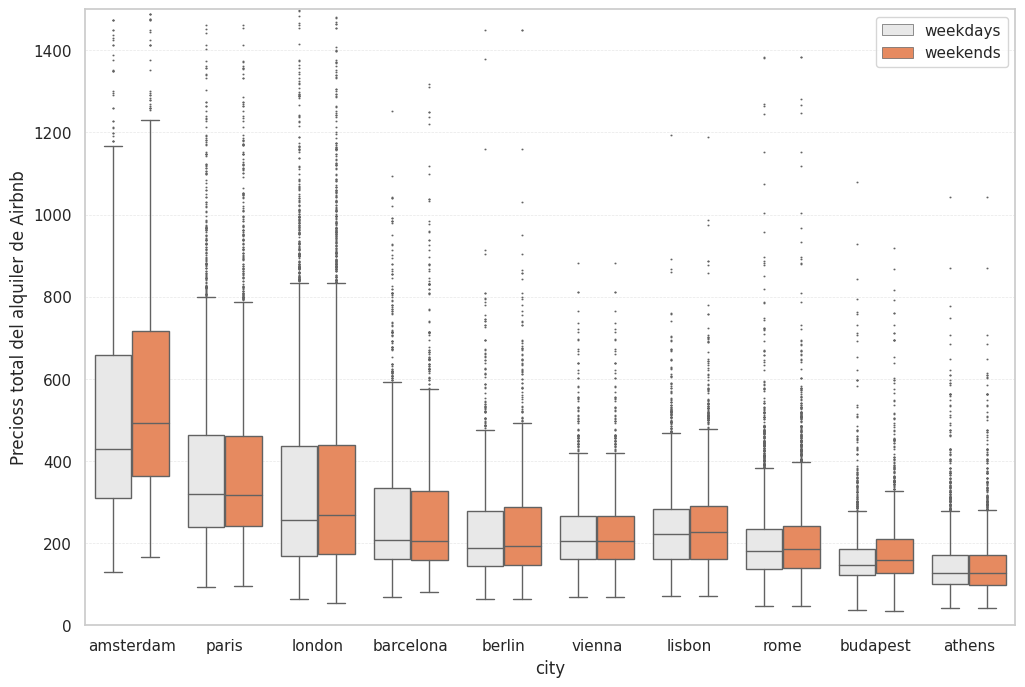

In [158]:
#seteamos variable de estilo, tamaño y color
plt.figure(figsize=(12,8))
ax = plt.subplot()
plt.axis([0,8,0,1500])
sns.set_theme(style="ticks", palette="pastel")
#crear grafico de cajas
sns.boxplot(x="city", y="realSum", hue="week_time", data=europe_data, palette=["#E8E8E8","#FC814A"], fliersize=0.5, linewidth=1, order=ranks)

#modificar atributos del grafico
plt.ylabel("Precioss total del alquiler de Airbnb")
ax.set_xticklabels(ranks)
plt.grid(axis="y", color="#E8E8E8", linestyle="--", linewidth=0.5)
plt.legend(loc=1)
plt.show
plt.clf

In [159]:
europe_data_weekends = europe_data[europe_data.week_time == "weekends"]

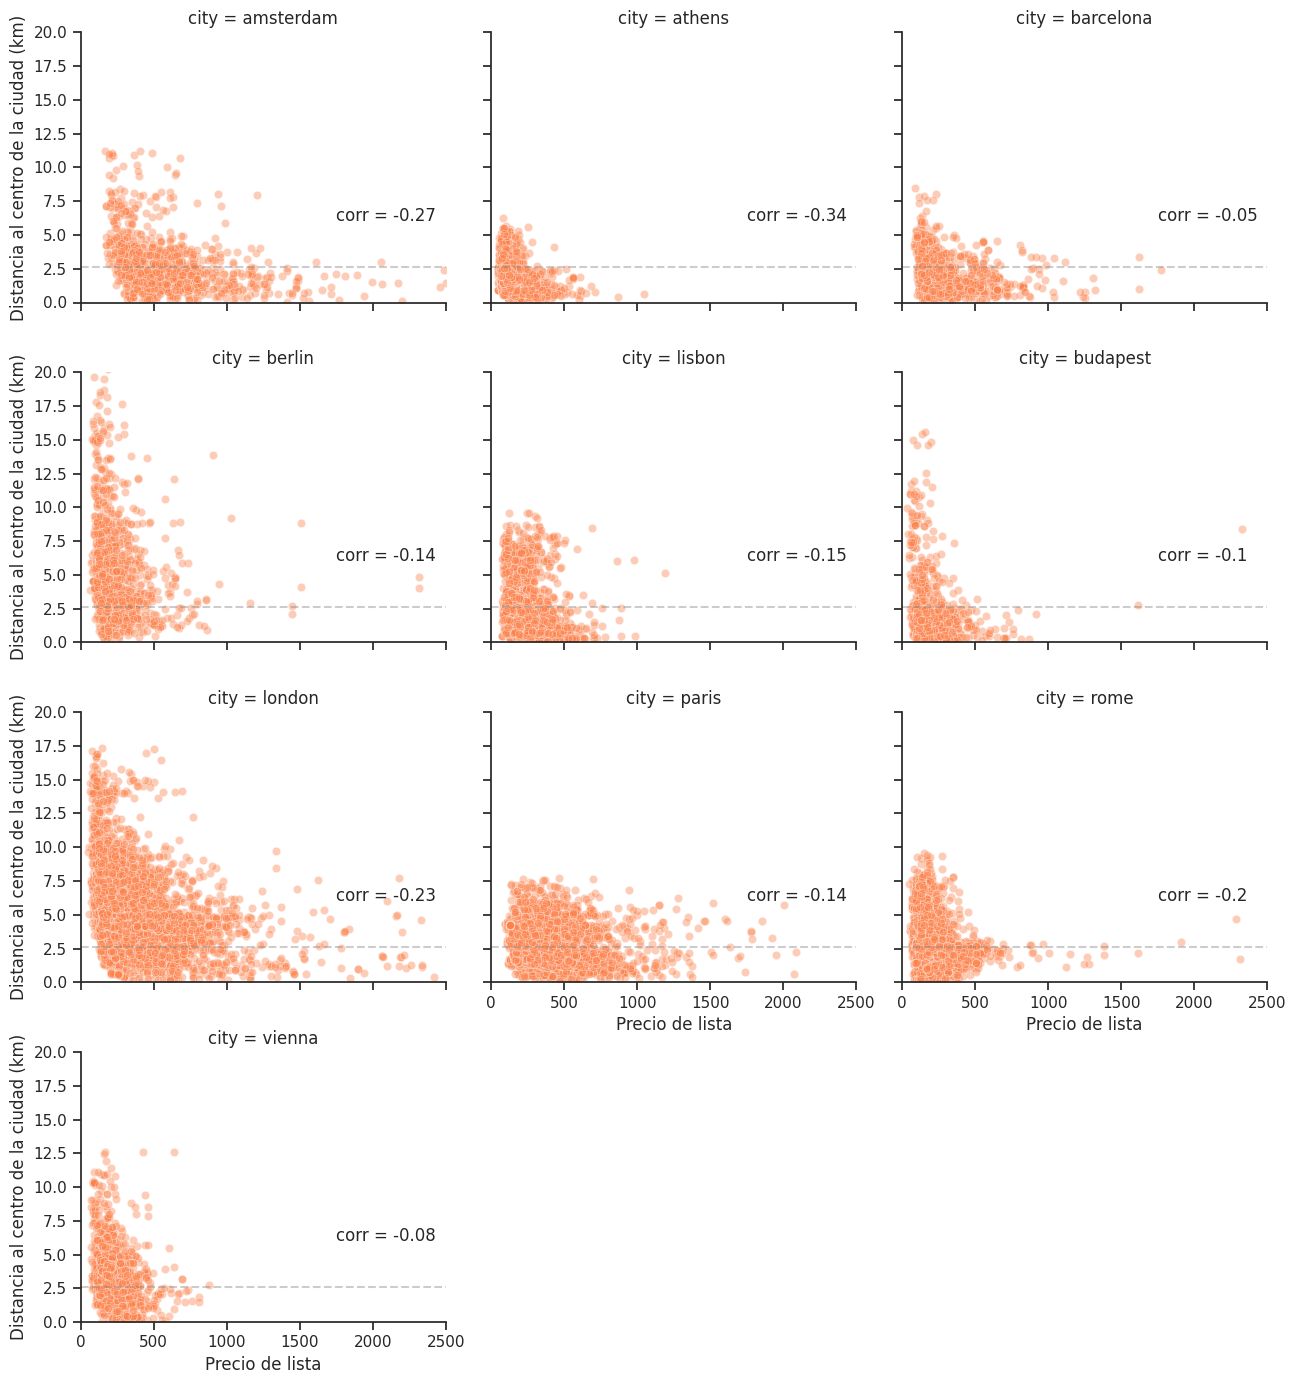

In [160]:
#crear grafico de mapa
grid = sns.FacetGrid(europe_data_weekends, col="city", col_wrap=3, xlim=(0,2500), ylim=(0,20), height=3.5, aspect=1.25)
grid.map(sns.scatterplot, "realSum", "dist", color="#FC814A", alpha=0.4)
grid.refline(y=europe_data_weekends.dist.median(), alpha=0.4)
#modificass titulos o atributo del grafico
grid.set_axis_labels("Precio de lista", "Distancia al centro de la ciudad (km)")

#metodo para calcular ditancia
def annotate(data, **kws):
    n=len(data)
    corr, p = pearsonr(data.realSum, data.dist)
    ax = plt.gca()
    ax.text(.7,.3,f"corr = {round(corr,2)}",transform=ax.transAxes)
    
grid.map_dataframe(annotate)

plt.show()

In [162]:
europe_data["week_time"] = europe_data.week_time.apply(lambda x: 1 if x=="weekday" else 0)

In [163]:
europe_data = pd.get_dummies(data=europe_data, columns=["city"])

In [164]:
#seleccionamos columnas para ML
features = europe_data[["room_shared","room_private","person_capacity","host_is_superhost","multi","biz","cleanliness_rating","guest_satisfaction_overall","bedrooms","dist","metro_dist","week_time","city_amsterdam","city_athens","city_barcelona","city_berlin","city_budapest","city_lisbon","city_london","city_paris","city_rome","city_vienna"]]

In [166]:
features.head(5)

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna
0,False,True,2,False,1,0,10.0,93.0,1,5.022964,...,True,False,False,False,False,False,False,False,False,False
1,False,True,4,False,0,0,8.0,85.0,1,0.488389,...,True,False,False,False,False,False,False,False,False,False
2,False,True,2,False,0,1,9.0,87.0,1,5.748312,...,True,False,False,False,False,False,False,False,False,False
3,False,True,4,False,0,1,9.0,90.0,2,0.384862,...,True,False,False,False,False,False,False,False,False,False
4,False,True,2,True,0,0,10.0,98.0,1,0.544738,...,True,False,False,False,False,False,False,False,False,False


In [170]:
#seteamos valores para ML
x = features.values
y = europe_data.realSum

#generamoss sets de prueba y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
MLR = LinearRegression()
model = MLR.fit(x_train, y_train)
y_predict = MLR.predict(x_test)

train_score = MLR.score(x_train, y_train)
test_score = MLR.score(x_test, y_test)
print(train_score, test_score)

0.2392384056527228 0.16534069333011803


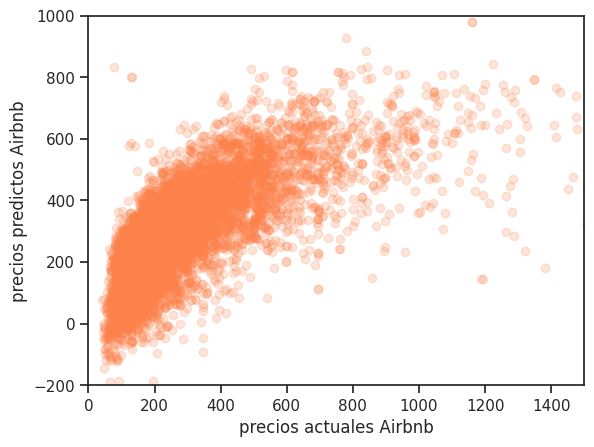

departamento en berlin con habitacion privada, para 2 personas, con un rating 9.5, satisfaccion 92, 0.5km de ciudad, no disponible para negocio
precio de lista predecido para el departamento:$269.12


In [172]:
#creamos grafico de burbuja
plt.scatter(y_test, y_predict, color="#FC814A", alpha=0.2)
plt.axis([0,1500,-200,1000])
plt.ylabel("precios predictos Airbnb")
plt.xlabel("precios actuales Airbnb")
plt.show()
plt.close()
#departamento en berlin con habitacion privada, para 2 personas, con un rating 9.5, satisfaccion 92, 0.5km de ciudad, no disponible para negocio
airbnb_apartment_ams = [[False,True,2,False,1,0,9.5,92.0,1,0.5,0.2,1,0,0,0,1,0,0,0,0,0,0]]
predict_airbnb_apartment_ams = MLR.predict(airbnb_apartment_ams)
print("departamento en berlin con habitacion privada, para 2 personas, con un rating 9.5, satisfaccion 92, 0.5km de ciudad, no disponible para negocio")
print("precio de lista predecido para el departamento:$%.2f" %predict_airbnb_apartment_ams)
